### k-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np

In [2]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
churn_df.shape

(3333, 20)

In [3]:
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


The features to use will be `account_length` and `customer_service_calls`. The target, `churn`, needs to be a single column with the same number of observations as the feature data.

We will convert the features and the target variable into NumPy arrays, create an instance of a KNN classifier, and then fit it to the data.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Create arrays for the features and the target variable
y = churn_df['churn'].values
X = churn_df[['account_length', 'customer_service_calls']].values

In [6]:
# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [7]:
# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [8]:
# New observations
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

In [9]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

In [10]:
# Print the predictions for X_new
print('Predictions: {}'.format(y_pred))

Predictions: [0 1 0]


#### Measuring Model Performance

**How do we measure accuracy?**

${accuracy = \frac{correct predictions}{total observations}}$

It's good if we split data into train and test datasets as computing accuracy of model on which we trained the model if not significant. We want to see how model performed on unseen data i.e. the test dataset.

In [11]:
import graphviz

In [12]:
# Create a Digraph object
dot = graphviz.Digraph()

# Add nodes
dot.node('A', 'Split Data')
dot.node('B', 'Training Set')
dot.node('C', 'Test Set')
dot.node('D', 'Fit/Train Clssifier on Training Set')
dot.node('E', 'Calculate Accuracy using Test Set')

# Add edges
dot.edges(['AB', 'AC', 'BD', 'DE', 'CE'])

# Render and display the diagram
dot.render('flowchart', view=True)

'flowchart.pdf'

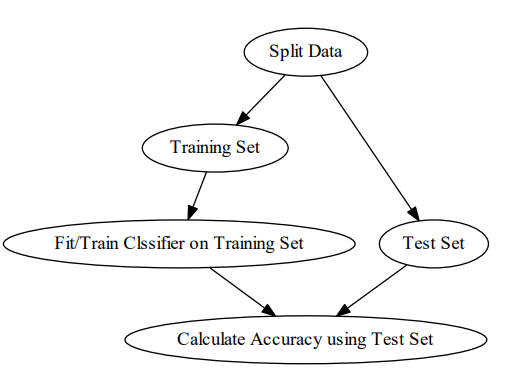

#### Train/Test Split + Computing Accuracy

In [13]:
# Import the module
from sklearn.model_selection import train_test_split

In [14]:
# Create arrays for the features and the target variable
y = churn_df['churn'].values
X = churn_df.drop('churn', axis=1).values

In [15]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [16]:
# Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# Print the accuracy
knn.score(X_test, y_test)

0.8545727136431784

#### Overfitting and Underfitting

Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Our aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

In [19]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    
    print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0} 
 {1: 0.7856071964017991}
[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218} 
 {1: 0.7856071964017991, 2: 0.8470764617691154}
[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896}
[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991}
[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784}
[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202} 
 {1:

In [20]:
import matplotlib.pyplot as plt

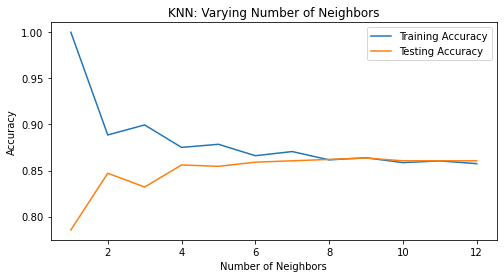

In [21]:
# Add a title
plt.figure(figsize=(8, 4))
plt.title('KNN: Varying Number of Neighbors')

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# Display the plot
plt.show()